In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('hmeq.csv')
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [2]:
df=pd.read_csv('hmeq.csv')
df['MORTDUE'].fillna(value=0,inplace=True)
df['VALUE'].fillna(value=0, inplace=True)     #'CLAGE'     #最長貸款往來期間-月(Age of oldest trade line in months)
#df=df[['BAD(拖欠貸款)','LOAN(貸款額)','MORTDUE(現有抵押貸款)','VALUE(當前財產的價值)','YOJ(現在的工作多久了)','DEROG(不良報告數量)','DELINQ(欠款額度)','CLAGE(最長貸款往來期間-月)','NINQ(最近的信用額度)','CLNO(信用額度)','DEBTINC(債務收入比)']]
df=df[['BAD','LOAN','MORTDUE','VALUE','YOJ','DEROG','DELINQ','NINQ','CLNO','CLAGE','DEBTINC']]
df=df.dropna(axis=0)
df.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,NINQ,CLNO,CLAGE,DEBTINC
5,1,1700,30548.0,40320.0,9.0,0.0,0.0,1.0,8.0,101.466002,37.113614
7,1,1800,28502.0,43034.0,11.0,0.0,0.0,0.0,8.0,88.766030,36.884894
19,0,2300,102370.0,120953.0,2.0,0.0,0.0,0.0,13.0,90.992533,31.588503
25,1,2400,34863.0,47471.0,12.0,0.0,0.0,1.0,21.0,70.491080,38.263601
26,0,2400,98449.0,117195.0,4.0,0.0,0.0,0.0,13.0,93.811775,29.681827


In [3]:
x=df[['LOAN','MORTDUE','VALUE','YOJ','DEROG','DELINQ','NINQ','CLNO','CLAGE','DEBTINC']]
y=df['BAD']

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [6]:
x_train.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,NINQ,CLNO,CLAGE,DEBTINC
433,6700,51855.0,58084.0,21.0,0.0,0.0,0.0,19.0,193.754746,19.549572
4240,22100,92724.0,126348.0,11.0,0.0,0.0,1.0,24.0,122.265781,30.843505
599,7600,0.0,28593.0,20.0,0.0,0.0,0.0,16.0,180.168937,35.583403
2211,13600,67354.0,81255.0,10.0,0.0,0.0,4.0,36.0,255.378757,41.625399
3123,16900,61847.0,91671.0,9.0,0.0,0.0,0.0,20.0,202.053436,21.348255


In [7]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=3, n_estimators=10)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [8]:
print('The accuracy of Random Forest Classifier on testing set:', rfc.score(x_test, y_test))

The accuracy of Random Forest Classifier on testing set: 0.9191374663072777


In [9]:
testResults = rfc.predict(x_test)

In [10]:
x_test['預測']=testResults
x_test['真實']=y_test

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
x_test['不同'] = x_test['預測'] - x_test['真實']

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
x_test.loc[x_test['不同'] != 0]

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,NINQ,CLNO,CLAGE,DEBTINC,預測,真實,不同
1808,12200,53242.0,70400.0,14.0,0.0,0.0,0.0,18.0,169.930664,34.629428,0,1,-1
4091,21400,104657.0,147364.0,7.0,2.0,0.0,2.0,20.0,149.254480,46.305072,0,1,-1
4129,21600,144276.0,190797.0,0.0,1.0,4.0,2.0,18.0,313.427322,37.971355,0,1,-1
4301,22400,51470.0,68139.0,9.0,0.0,0.0,2.0,8.0,31.168696,37.952180,0,1,-1
1438,10900,49352.0,56529.0,7.0,0.0,1.0,2.0,23.0,78.833618,36.174955,0,1,-1
1956,12800,40932.0,72172.0,20.0,0.0,0.0,0.0,16.0,162.044010,37.518366,0,1,-1
3550,18700,39441.0,71345.0,11.0,0.0,4.0,0.0,13.0,132.836758,27.691648,0,1,-1
3482,18400,88352.0,110216.0,1.0,0.0,0.0,3.0,31.0,376.723643,47.830671,0,1,-1
1708,12000,76345.0,89036.0,8.0,0.0,0.0,1.0,19.0,91.970350,50.173065,0,1,-1
5874,53400,228236.0,305514.0,6.0,0.0,0.0,0.0,2.0,11.148069,34.558417,0,1,-1


In [13]:
x_test.loc[x_test['不同'] == 0]

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,NINQ,CLNO,CLAGE,DEBTINC,預測,真實,不同
3557,18700,110292.0,132953.0,7.0,0.0,0.0,0.0,14.0,105.424888,30.552752,0,0,0
3130,17000,0.0,0.0,1.0,0.0,0.0,0.0,21.0,111.235012,31.362872,1,1,0
5517,34000,232312.0,286305.0,4.0,0.0,0.0,0.0,29.0,219.658932,15.735935,0,0,0
1772,12100,68941.0,75029.0,14.0,0.0,0.0,0.0,31.0,254.189656,43.897850,0,0,0
5062,27000,77910.0,117590.0,4.0,0.0,0.0,2.0,31.0,91.874211,38.497155,0,0,0
2292,13900,88746.0,108160.0,9.0,0.0,0.0,0.0,25.0,234.948951,30.951437,0,0,0
1989,12900,105638.0,112608.0,17.0,0.0,2.0,2.0,16.0,208.306882,39.677906,0,0,0
4635,24300,123686.0,153184.0,4.0,0.0,0.0,0.0,25.0,298.282913,36.336564,0,0,0
4179,21800,90065.0,122335.0,3.0,0.0,0.0,1.0,26.0,212.695468,34.846919,0,0,0
1270,10300,51787.0,86200.0,17.0,0.0,0.0,0.0,16.0,203.732763,34.435246,0,0,0


In [14]:
estimator_limited = rfc.estimators_[9]

from sklearn.tree import export_graphviz
export_graphviz(estimator_limited, out_file='tree_limited.dot', feature_names = x_train.columns,
                class_names = [str(i) for i in y_test.unique()],
                rounded = True, proportion = False, precision = 2, filled = True)

In [15]:
from subprocess import call
call(['dot', '-Tpng', 'tree_limited.dot', '-o', 'tree_limited.png', '-Gdpi=600'])

0

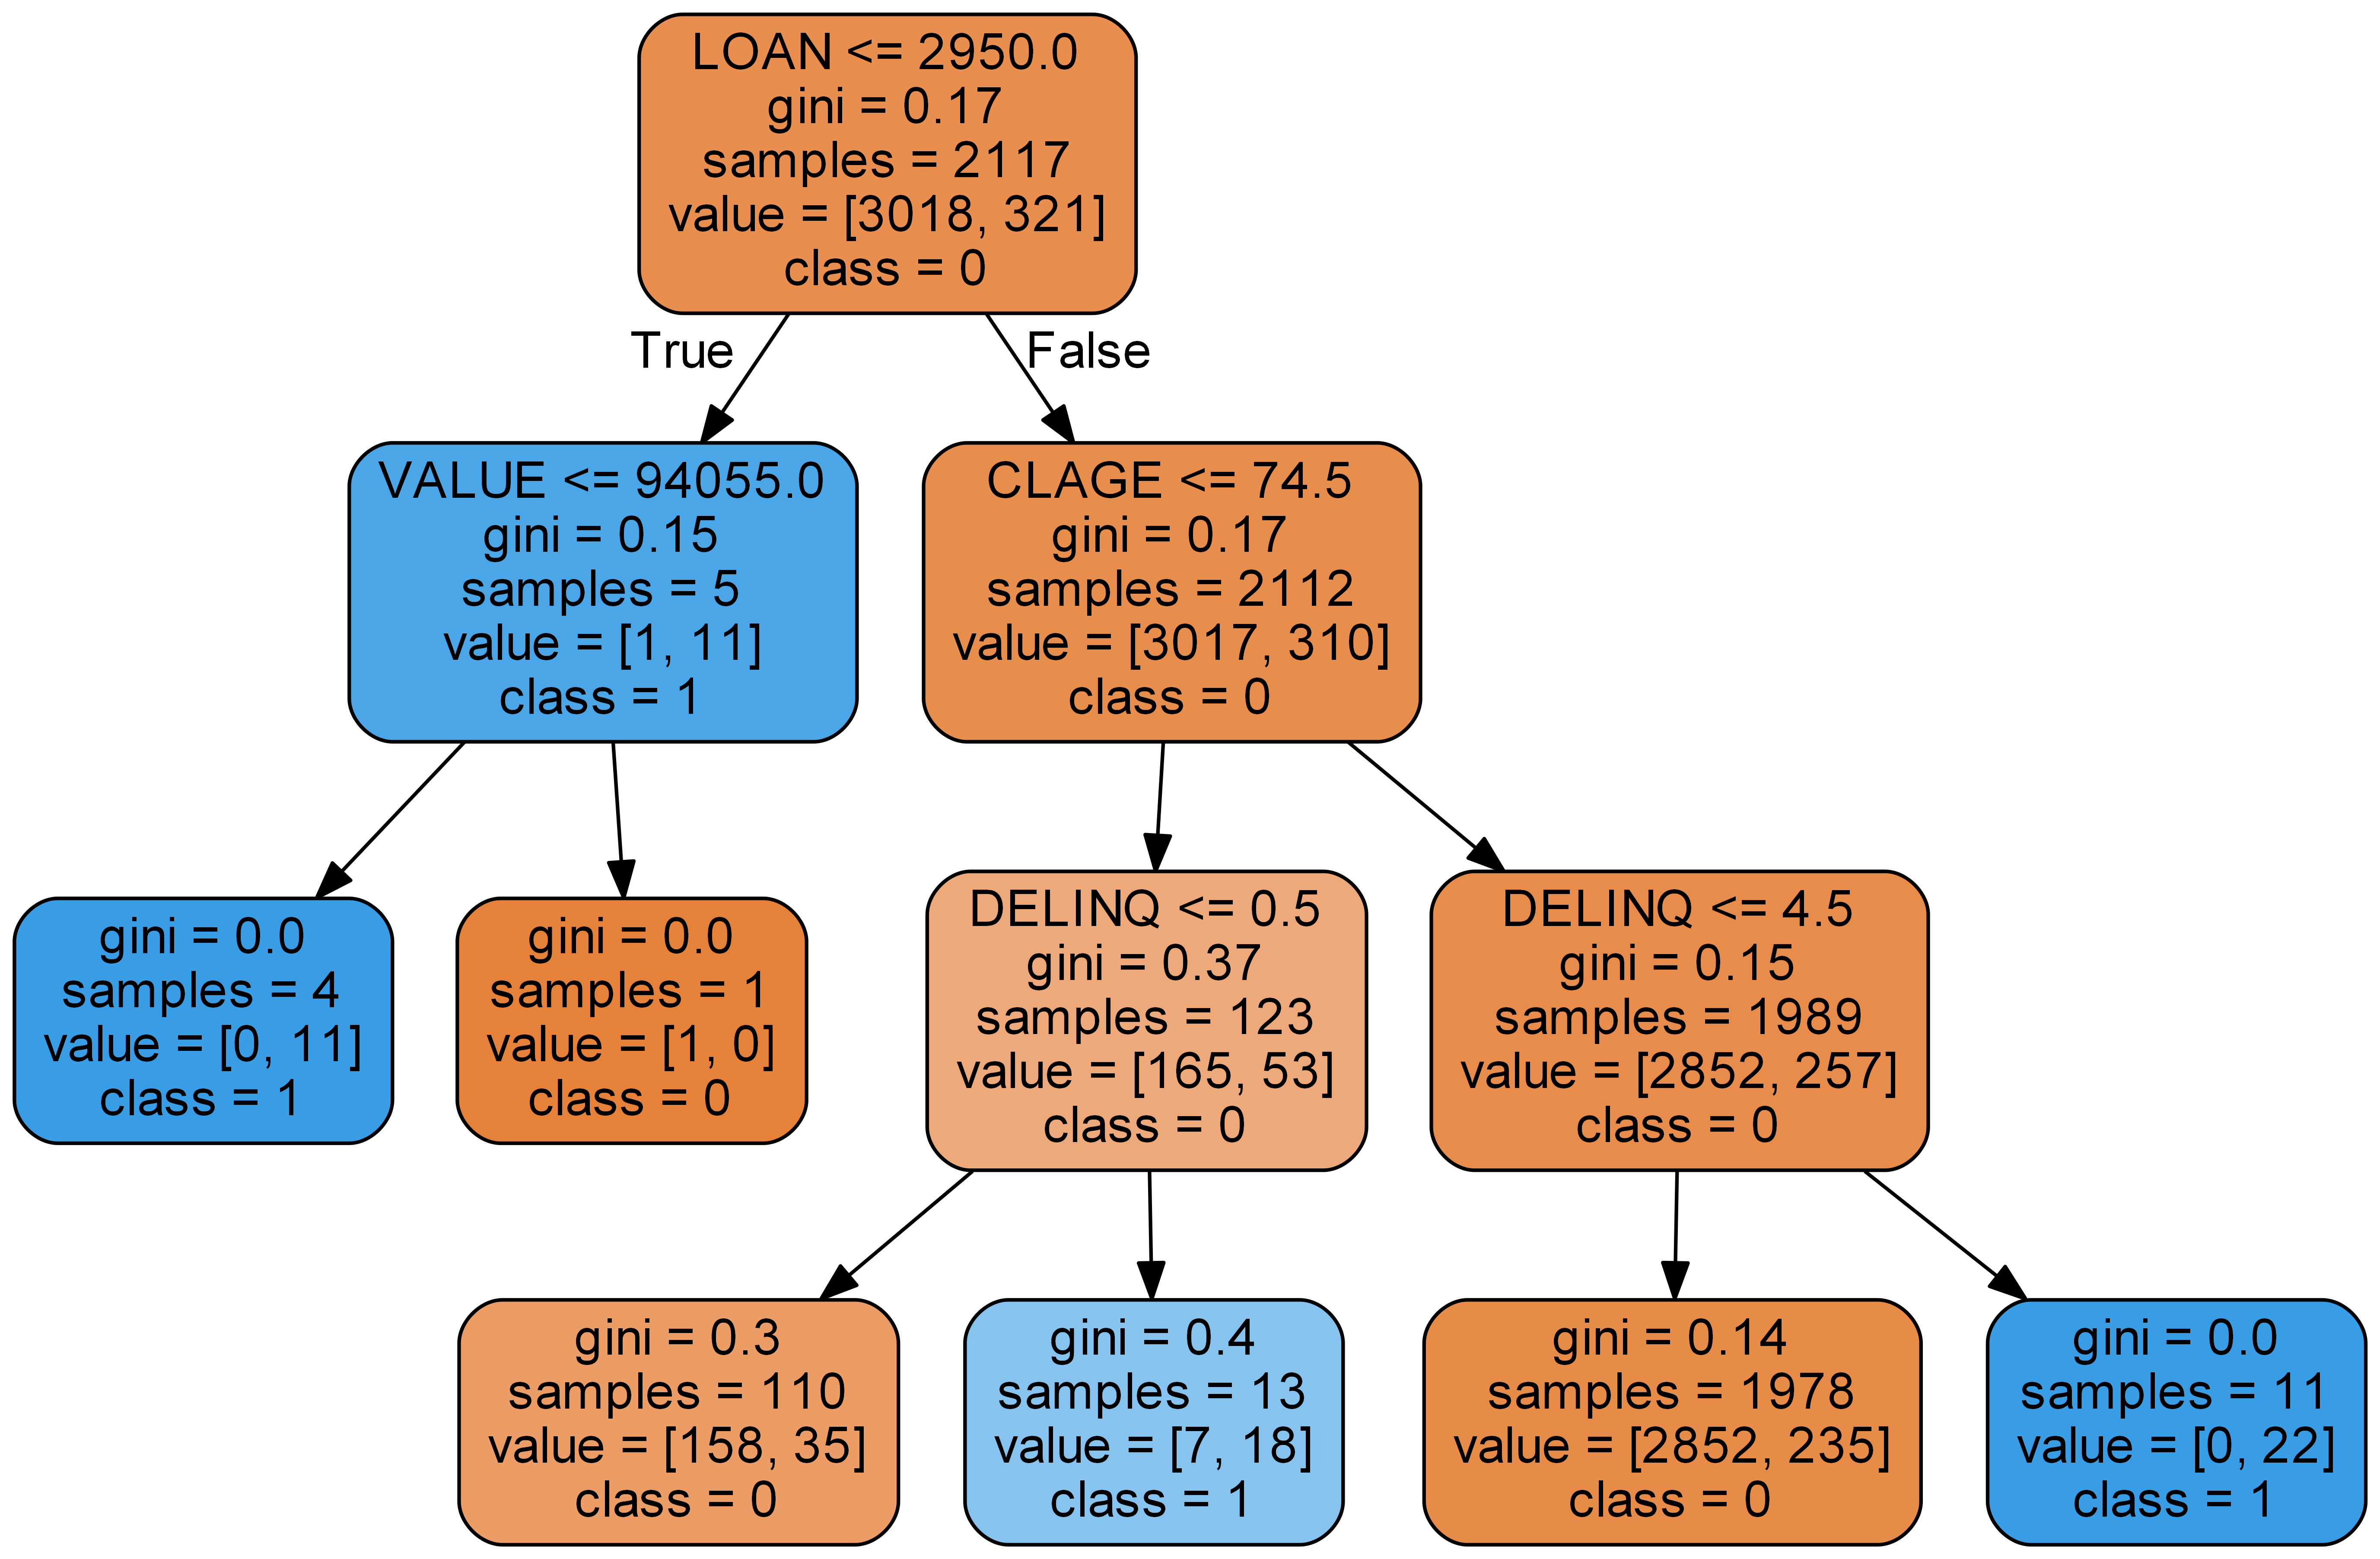

In [16]:
from IPython.display import Image
Image(filename ='tree_limited.png')